# EDA Grammys


In [50]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from src.db.db_conection import connect_db
from sqlalchemy import text 

In [51]:
engine = connect_db()

In [52]:
df = pd.read_sql_query('SELECT * FROM "grammyAwards"', engine)
df.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4804 non-null   object
 6   artist        2970 non-null   object
 7   workers       2620 non-null   object
 8   img           3443 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB


trafnrormaos a tipo dat e loas columansde published_at y update_at


In [54]:
df["updated_at"] = pd.to_datetime(df["updated_at"], utc=True)
df["published_at"] = pd.to_datetime(df["published_at"], utc=True)

In [55]:

df.shape

(4810, 10)

In [56]:

print(df.isnull().sum())

year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64


In [57]:
df = df.dropna()

In [58]:
df.isnull().sum()

year            0
title           0
published_at    0
updated_at      0
category        0
nominee         0
artist          0
workers         0
img             0
winner          0
dtype: int64

In [59]:
df[df.duplicated(keep=False)]

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner


In [60]:

print(df.dtypes)

year                          int64
title                        object
published_at    datetime64[ns, UTC]
updated_at      datetime64[ns, UTC]
category                     object
nominee                      object
artist                       object
workers                      object
img                          object
winner                         bool
dtype: object


In [61]:
df.dtypes.value_counts()

object                 6
datetime64[ns, UTC]    2
int64                  1
bool                   1
Name: count, dtype: int64

In [62]:
print(df.describe(include="object"))

                                    title           category    nominee  \
count                                 834                834        834   
unique                                 56                104        808   
top     53rd Annual GRAMMY Awards  (2010)  Album Of The Year  24K Magic   
freq                                   43                 60          3   

                   artist                                            workers  \
count                 834                                                834   
unique                566                                                798   
top     (Various Artists)  T Bone Burnett, producer; Mike Piersante, engi...   
freq                   18                                                  3   

                                                      img  
count                                                 834  
unique                                                527  
top     https://www.grammy.com/sites/com/fi

In [63]:
print(df.describe(include="datetime64[ns, UTC]"))

                              published_at  \
count                                  834   
mean   2018-01-25 10:24:12.622301952+00:00   
min              2017-11-28 08:03:45+00:00   
25%              2017-11-28 08:03:45+00:00   
50%              2017-11-28 08:03:45+00:00   
75%              2017-11-28 08:03:45+00:00   
max              2020-05-19 12:10:28+00:00   

                                updated_at  
count                                  834  
mean   2019-09-07 12:28:21.660671488+00:00  
min              2017-11-28 08:03:45+00:00  
25%              2019-09-10 08:06:11+00:00  
50%              2019-09-10 08:07:37+00:00  
75%              2019-09-10 08:09:02+00:00  
max              2020-09-01 19:16:40+00:00  


In [64]:
published_at = df["published_at"]
count_published_at = published_at.value_counts()
count_published_at 

published_at
2017-11-28 08:03:45+00:00    735
2020-05-19 12:10:28+00:00     34
2018-05-22 10:08:24+00:00     33
2018-12-07 07:48:49+00:00     32
Name: count, dtype: int64

In [65]:
updated_at = df["updated_at"]
count_updated_at = updated_at.value_counts()
count_updated_at

updated_at
2019-09-10 08:06:11+00:00    180
2019-09-10 08:08:19+00:00    139
2019-09-10 08:06:59+00:00    132
2019-09-10 08:07:37+00:00    131
2019-09-10 08:11:09+00:00     93
2019-09-10 08:09:02+00:00     52
2017-11-28 08:03:45+00:00     36
2020-09-01 19:16:40+00:00     35
2020-05-19 12:10:28+00:00     34
2019-09-10 08:11:48+00:00      2
Name: count, dtype: int64

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,834.0,2006.390887,9.847369,1962.0,2002.0,2008.0,2013.0,2019.0


In [75]:
selected_columns = ["year", "title", "category", "nominee", "artist", "winner"]
df = df[selected_columns]
df

,year,title,category,nominee,artist,winner
0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,True
1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,True
2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,Ariana Grande,True
3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Hard Place,H.E.R.,True
4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Talk,Khalid,True
...,...,...,...,...,...,...
4451,1966,9th Annual GRAMMY Awards (1966),Record Of The Year,Strangers In The Night,Frank Sinatra,True
4452,1966,9th Annual GRAMMY Awards (1966),Album Of The Year,A Man And His Music,Frank Sinatra,True
4494,1965,8th Annual GRAMMY Awards (1965),Record Of The Year,A Taste Of Honey,Herb Alpert And The Tijuana Brass,True
4495,1965,8th Annual GRAMMY Awards (1965),Album Of The Year,September Of My Years,Frank Sinatra,True


# visualaiza 

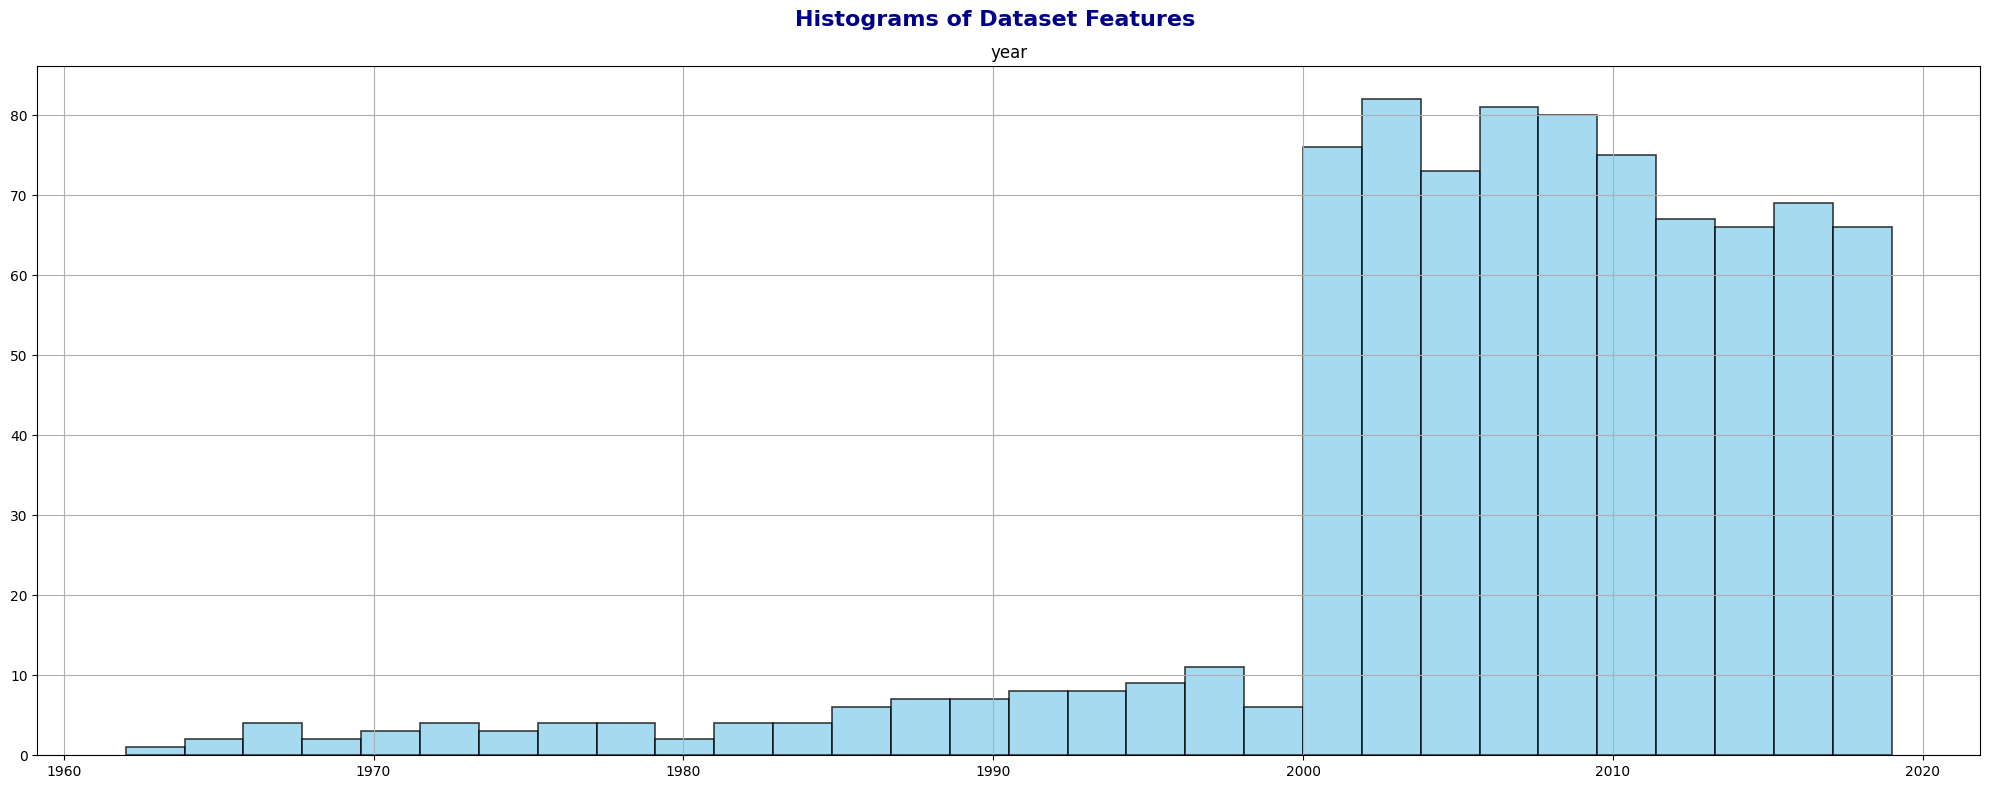

In [68]:
df.hist(figsize=(20 ,8), bins=30, color="skyblue", edgecolor="black", alpha=0.75, grid=True, linewidth=1.2)
plt.suptitle("Histograms of Dataset Features", fontsize=16, fontweight="bold", color="darkblue")
plt.tight_layout()

plt.show()

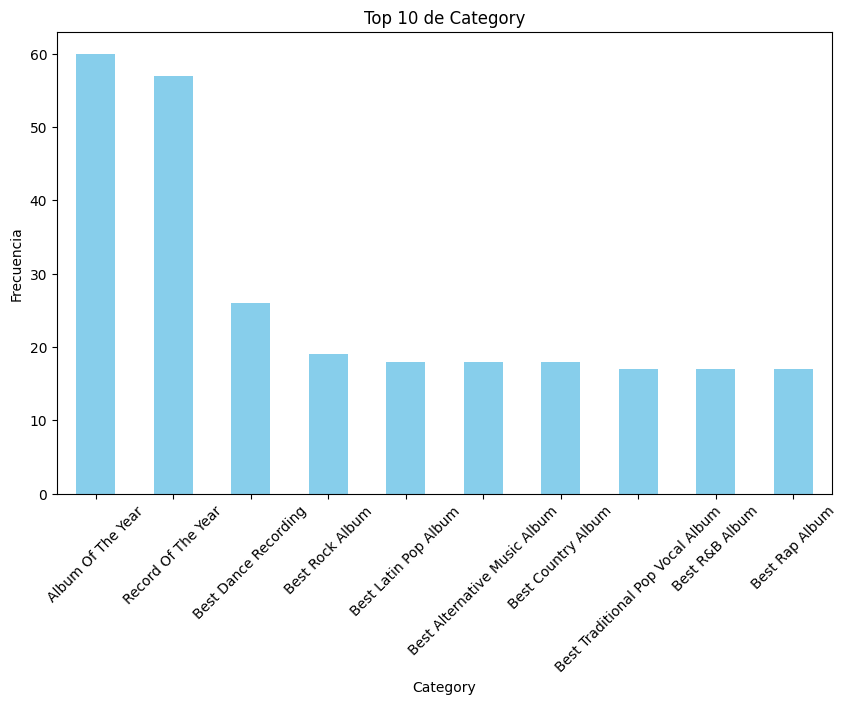

In [69]:
plt.figure(figsize=(10, 6))
df['category'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 de Category')
plt.xlabel('Category')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


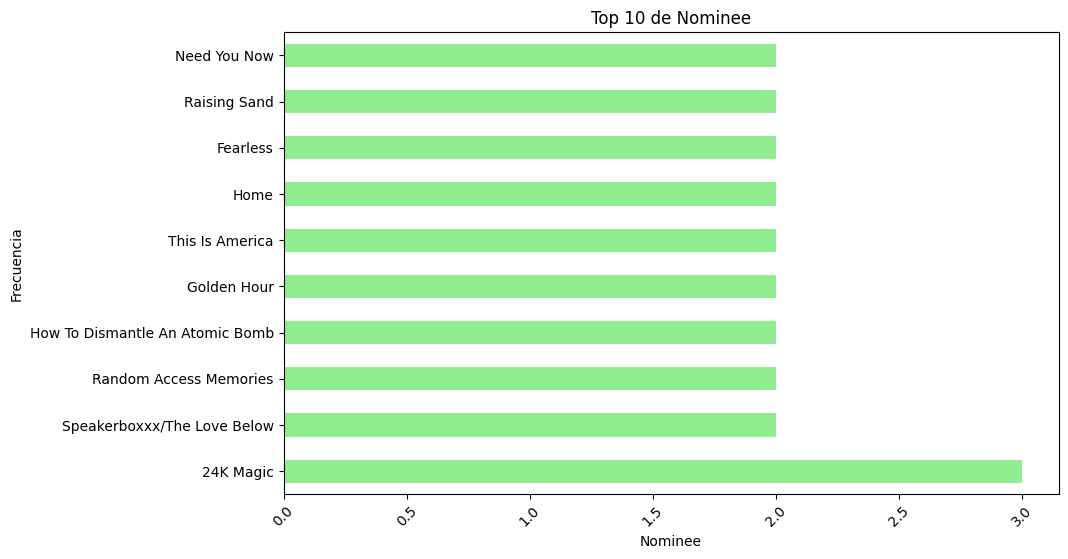

In [70]:
plt.figure(figsize=(10, 6))
df['nominee'].value_counts().head(10).plot(kind='barh', color='lightgreen')
plt.title('Top 10 de Nominee')
plt.xlabel('Nominee')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


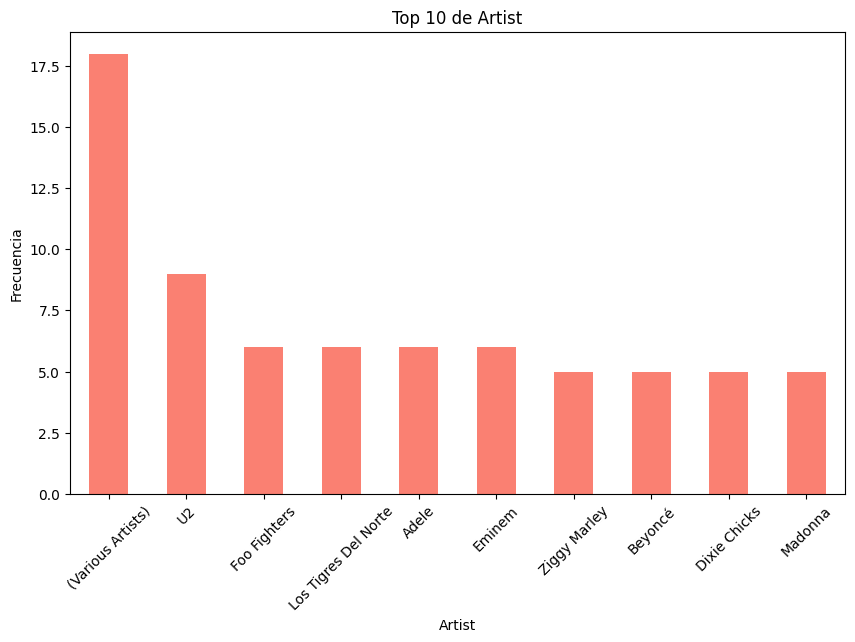

In [71]:
plt.figure(figsize=(10, 6))
df['artist'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 de Artist')
plt.xlabel('Artist')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

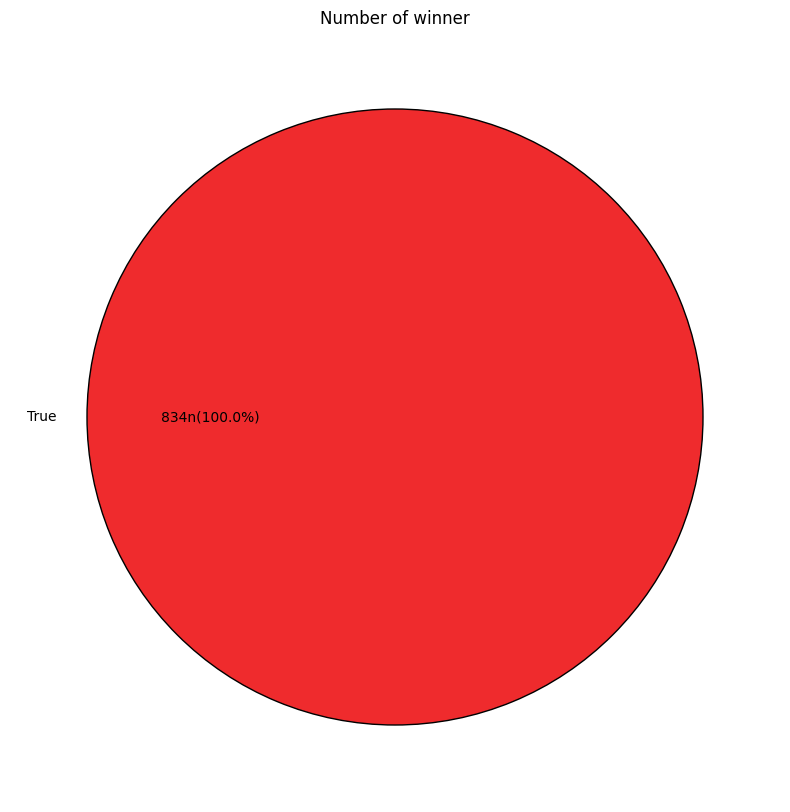

In [72]:
winner_counts = df['winner'].value_counts()

def func(pct, all_values):
    absolute = int(round(pct/100. *sum(all_values)))
    return f"{absolute}n({pct:.1f}%)"

plt.figure(figsize=(20,10))
plt.pie(winner_counts, labels=winner_counts.index, autopct=lambda pct: func(pct, winner_counts), colors=["#ef2b2d", "#FDB927" ], wedgeprops={'edgecolor': 'black'})
plt.title("Number of winner")
plt.show()


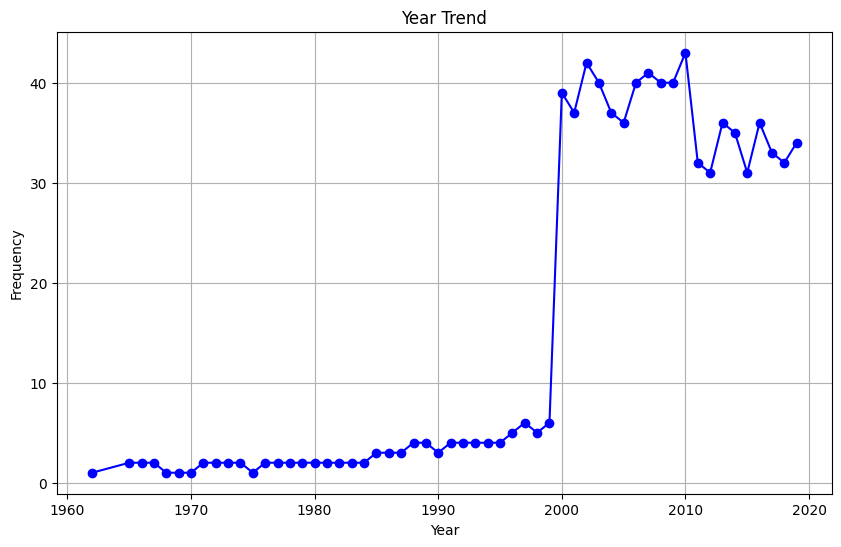

In [73]:
year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-', color='b')
plt.title('Year Trend')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


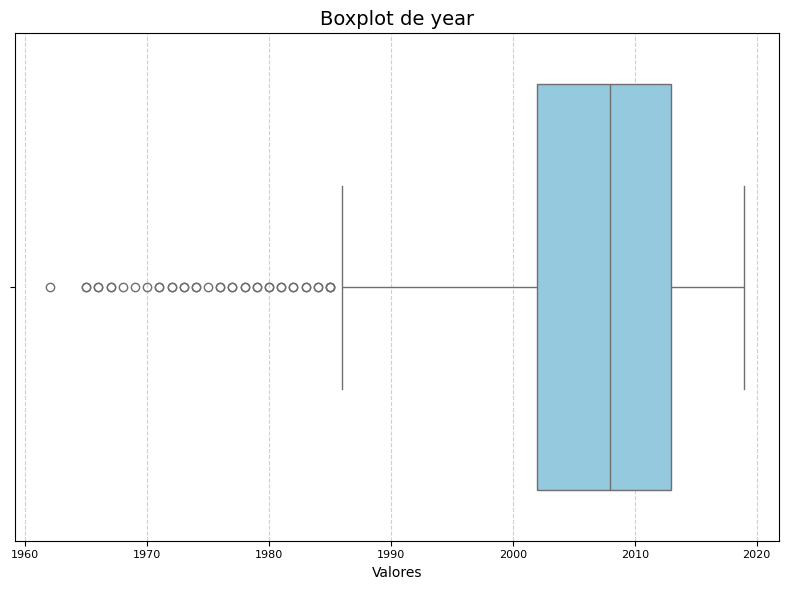


--- Handling Outliers for year ---
Number of Outliers: 40


In [74]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color='skyblue')  
    plt.title(f'Boxplot de {col}', fontsize=14)
    plt.xlabel('Valores', fontsize=10)
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.xticks(fontsize=8)
    plt.tight_layout()
    plt.show()

    print(f"\n--- Handling Outliers for {col} ---")

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    print(f"Number of Outliers: {len(outliers)}")